In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['alta-2018-challenge', 'alta2018traindata', 'alta2018patents']


In [3]:
print(os.listdir("../input/alta-2018-challenge"))

[]


In [4]:
train = pd.read_csv('../input/alta2018traindata/train_data.csv')

In [5]:
train.head()

,id,first_ipc_mark_section
0,0,A
1,1,G
2,2,A
3,3,A
4,4,D


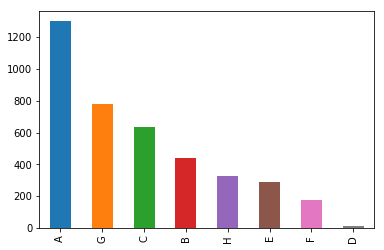

In [6]:
train['first_ipc_mark_section'].value_counts().plot.bar()

In [7]:
train['first_ipc_mark_section'].value_counts()

A    1303
G     781
C     637
B     442
H     330
E     287
F     178
D      14
Name: first_ipc_mark_section, dtype: int64

We can see that there is high imbalance in the data. We may need to do something about this, but let's create a baseline that ignores  the imbalance.

# Baselines

The first baseline will simply output the most common class: A. The following code uses sklearn as a framework to build the baseline and evaluate it using 5-fold cross-validation and F1-microaveraged evaluation metric.

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
first_baseline = DummyClassifier(strategy="most_frequent")
first_baseline_scores = cross_val_score(first_baseline, train[['id']], train['first_ipc_mark_section'], cv=5, scoring='f1_micro')
first_baseline_scores.mean()

0.328048351235355

The second baseline uses naive Bayes classification with tf.idf of the words as the features.

In [9]:
train['filename'] = ['../input/alta2018patents/patents/patents/'] + train['id'].astype(str) + ['.txt']
train.head()

,id,first_ipc_mark_section,filename
0,0,A,../input/alta2018patents/patents/patents/0.txt
1,1,G,../input/alta2018patents/patents/patents/1.txt
2,2,A,../input/alta2018patents/patents/patents/2.txt
3,3,A,../input/alta2018patents/patents/patents/3.txt
4,4,D,../input/alta2018patents/patents/patents/4.txt


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
tfidf = TfidfVectorizer(input='filename', encoding='iso8859-1')
nb = naive_bayes.MultinomialNB()
second_baseline = Pipeline(steps=[('tfidf', tfidf), ('nb', nb)])


In [12]:
second_baseline_scores = cross_val_score(second_baseline, train['filename'], train['first_ipc_mark_section'], cv=5, scoring='f1_micro')
second_baseline_scores.mean()

KeyboardInterrupt: 

The following code uses the entire data set for training the system using naive Bayes and create a run to be submitted to the competition.

In [ ]:
second_baseline.fit(train['filename'], train['first_ipc_mark_section'])

In [ ]:
test = pd.read_csv('../input/alta2018testdata/test_data.csv')
test.head()

In [ ]:
test['filename'] = ['../input/alta2018patents/patents/patents/'] + test['id'].astype(str) + ['.txt']

In [ ]:
test['first_ipc_mark_section'] = second_baseline.predict(test['filename'])
test.head()

In [ ]:
test['first_ipc_mark_section'].value_counts().plot.bar()

We can see that the labels associated to the test data by the second baseline are only the three most frequent labels in the training data. There is clearly room for improvement. Anyway, the code below creates a CSV file that has been submitted as the Naive Bayes baseline.

In [ ]:
test[['id', 'first_ipc_mark_section']].to_csv('test_results.csv', index=False)